# MAGIC Gamma Telescope
Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope

## Source
Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [ ]:
df['class'] = (df['class'] == 'g').astype(int)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [ ]:
df['class'].unique()

array([1, 0])

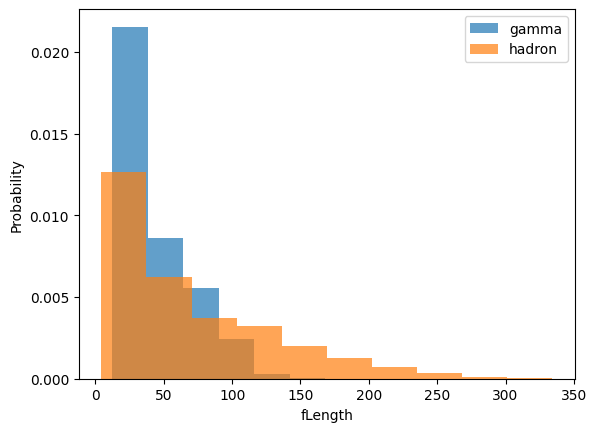

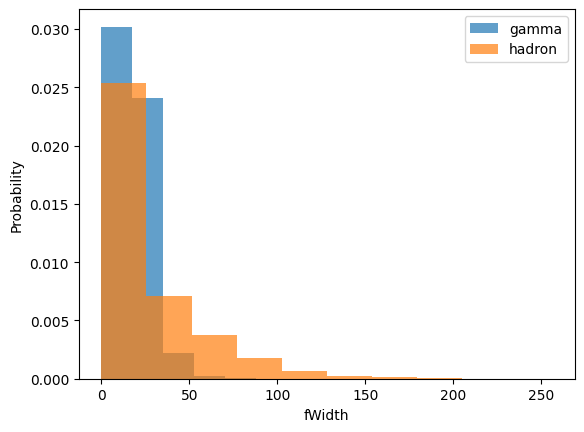

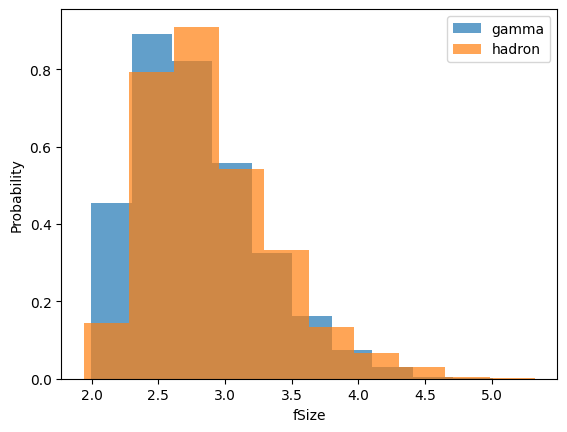

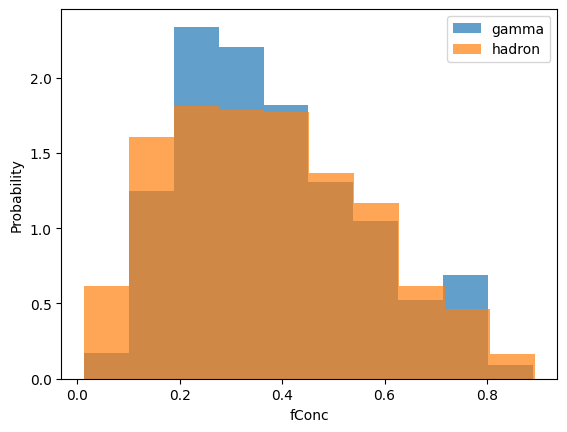

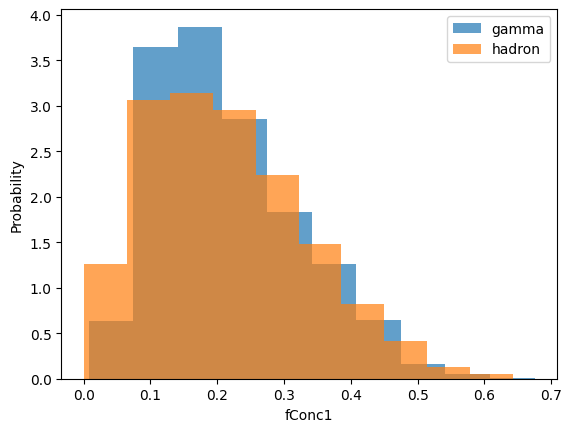

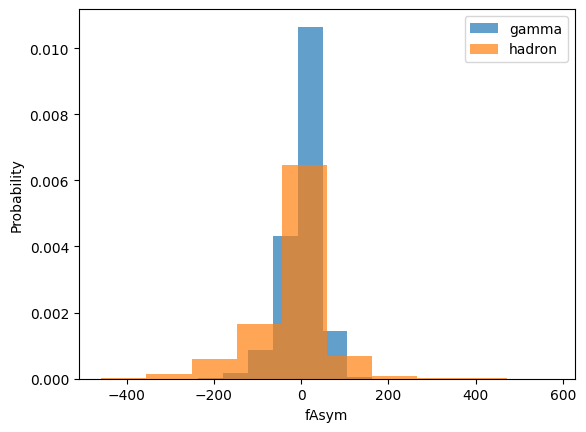

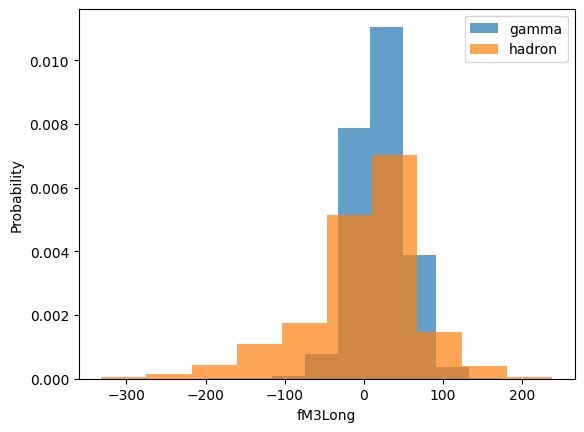

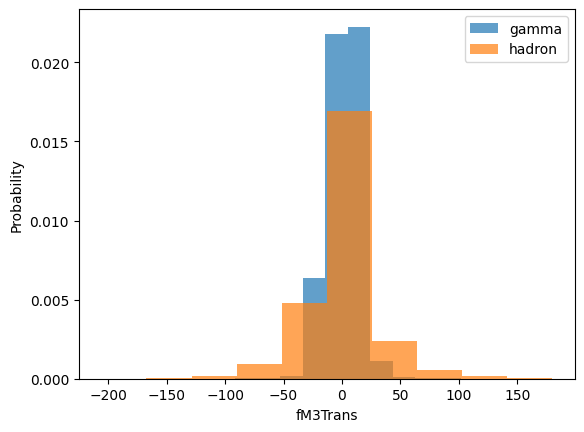

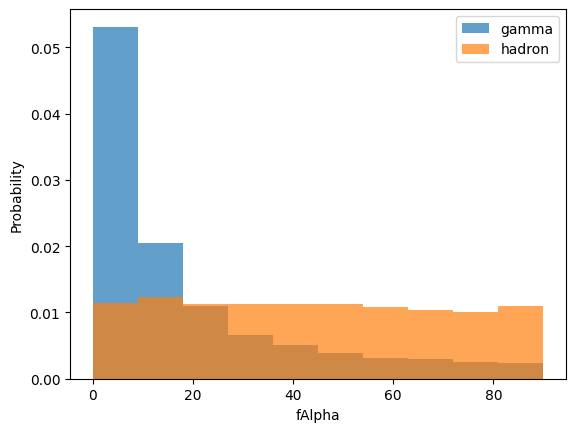

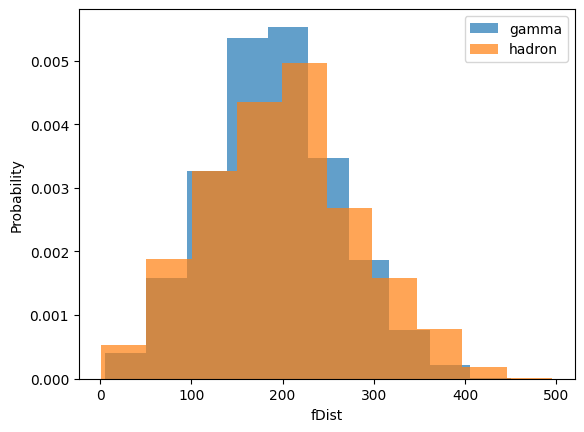

In [ ]:
for label in df.columns[:-1]:
  plt.hist(df[df['class'] == 1][label], label = 'gamma', alpha= 0.7, density=True )
  plt.hist(df[df['class'] == 0][label], label = 'hadron', alpha= 0.7, density=True )
  plt.legend()
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.show()

# Train, Validation, Test Datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)) , int(0.8* len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, over_sampling = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  X = StandardScaler().fit_transform(X)

  if over_sampling:
    X, y = RandomOverSampler().fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, over_sampling=True)
valid, X_valid, y_valid = scale_dataset(valid, over_sampling=False)
test, X_test, y_test = scale_dataset(test, over_sampling=False)

# kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1400
           1       0.84      0.85      0.84      2404

    accuracy                           0.80      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = NB_model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.38      0.49      1400
           1       0.71      0.90      0.80      2404

    accuracy                           0.71      3804
   macro avg       0.71      0.64      0.64      3804
weighted avg       0.71      0.71      0.69      3804



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = LR_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      1400
           1       0.82      0.83      0.83      2404

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM_model = SVC()
SVM_model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = SVM_model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1400
           1       0.87      0.90      0.89      2404

    accuracy                           0.85      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



# Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
def train(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs):
  NN_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  NN_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
  history = NN_model.fit(X_train, y_train, epochs=epochs, batch_size= batch_size, validation_split=0.2, verbose= 0)
  return history, NN_model

16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


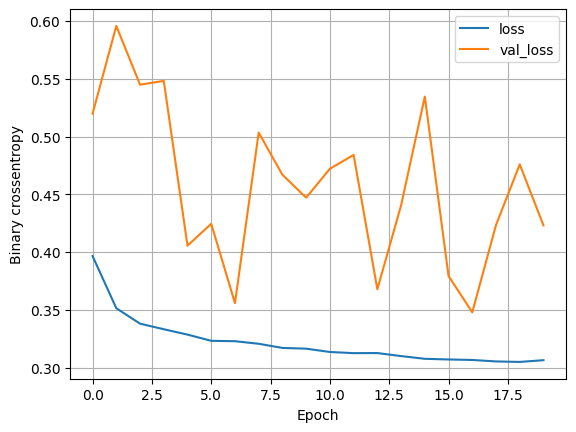

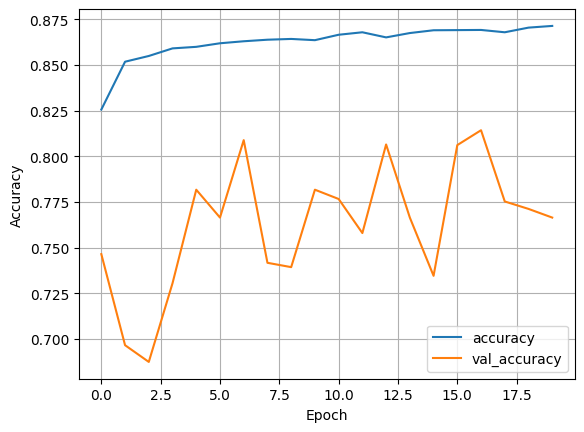

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8702 - loss: 0.3270
16 nodes, dropout 0, lr 0.01, batch size 64


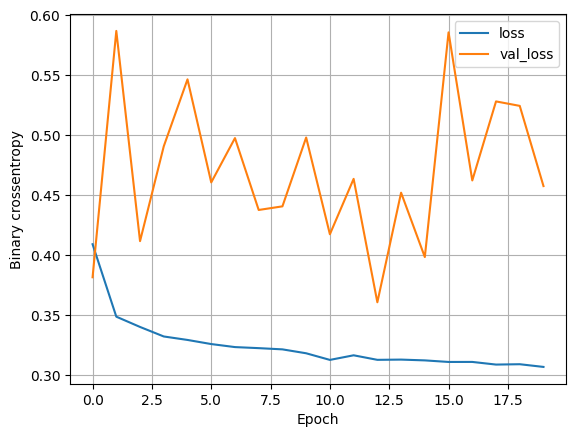

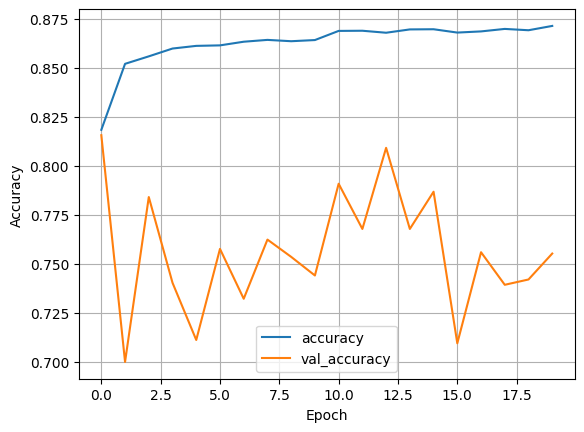

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8711 - loss: 0.3210
16 nodes, dropout 0, lr 0.01, batch size 128


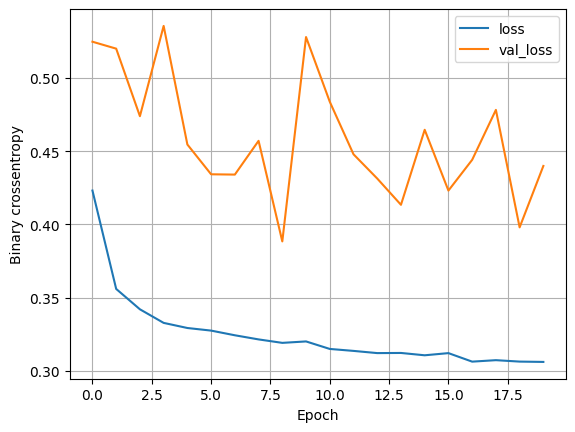

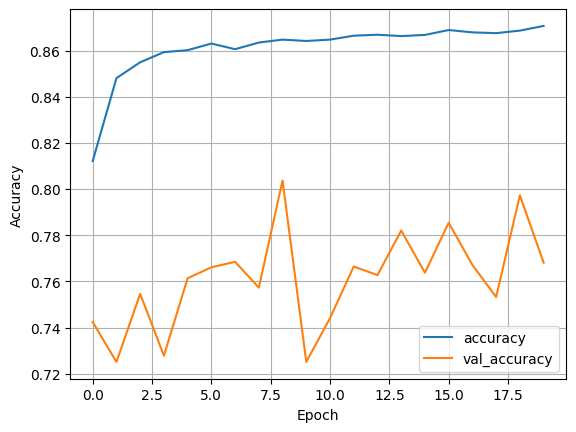

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8688 - loss: 0.3262
16 nodes, dropout 0, lr 0.005, batch size 32


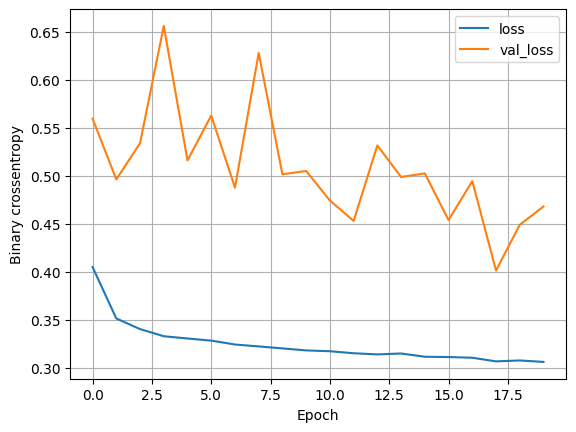

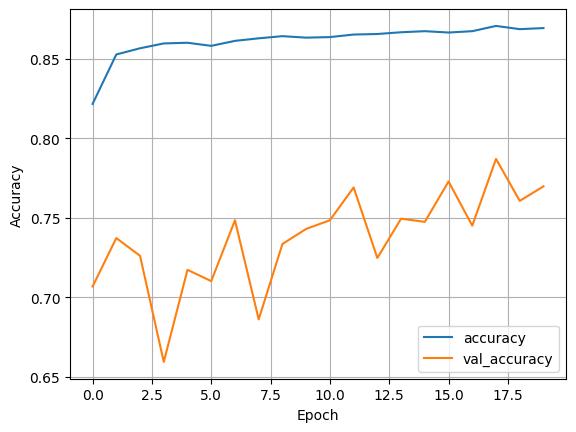

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8711 - loss: 0.3233  
16 nodes, dropout 0, lr 0.005, batch size 64


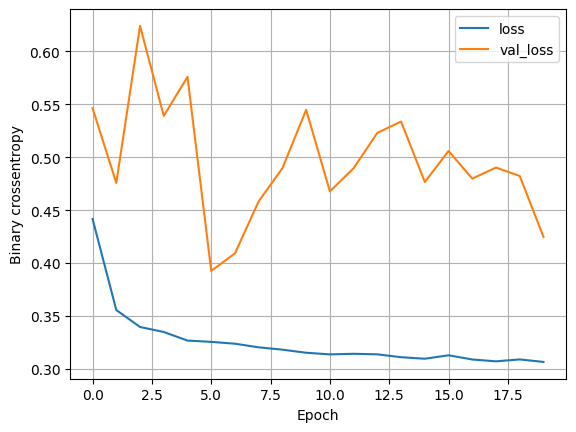

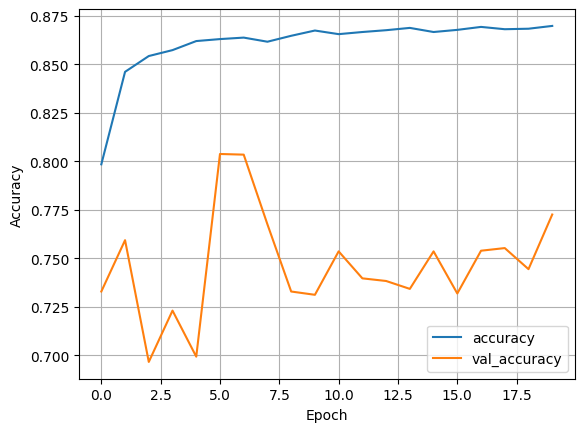

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8765 - loss: 0.3169
16 nodes, dropout 0, lr 0.005, batch size 128


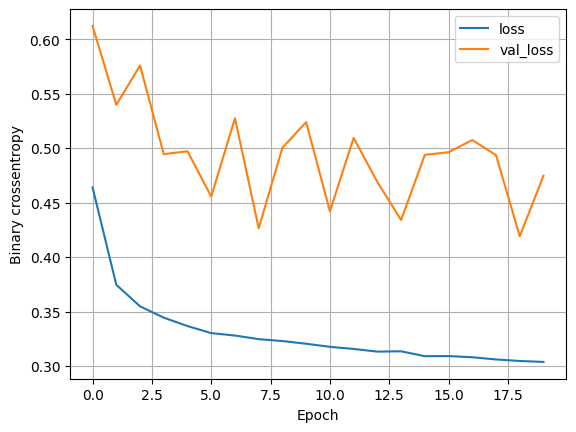

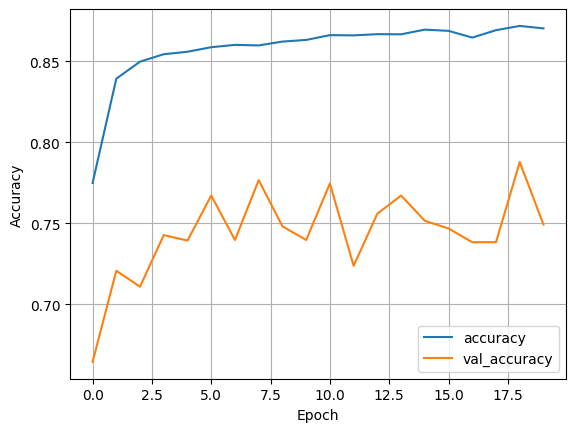

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8751 - loss: 0.3099
16 nodes, dropout 0, lr 0.001, batch size 32


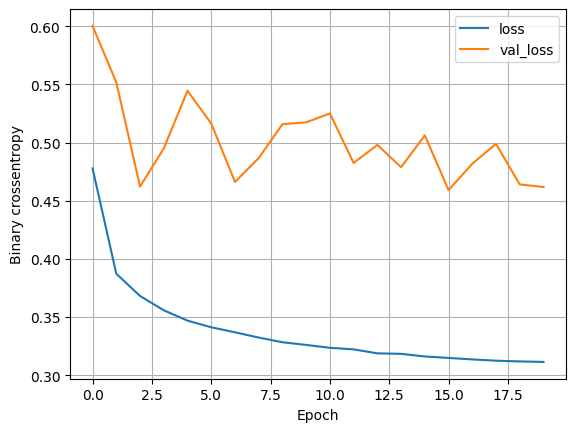

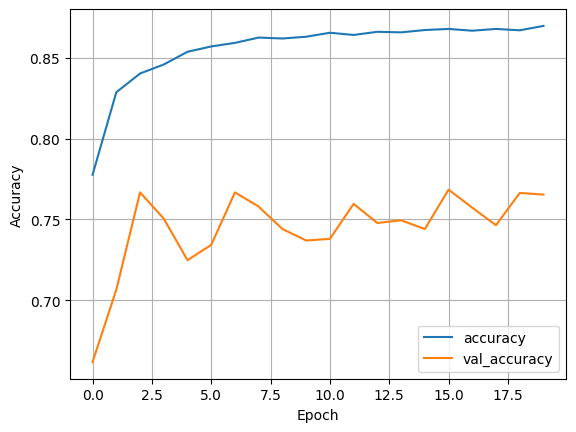

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8730 - loss: 0.3294
16 nodes, dropout 0, lr 0.001, batch size 64


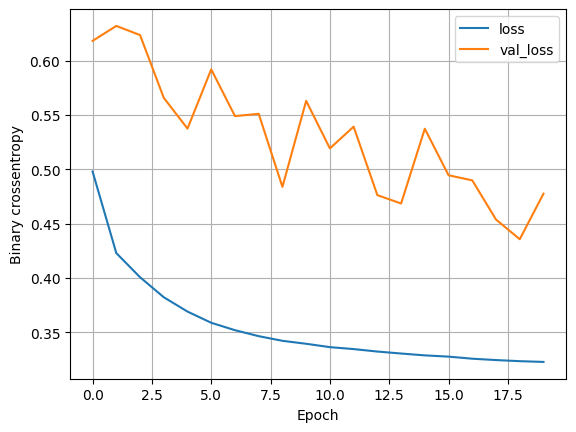

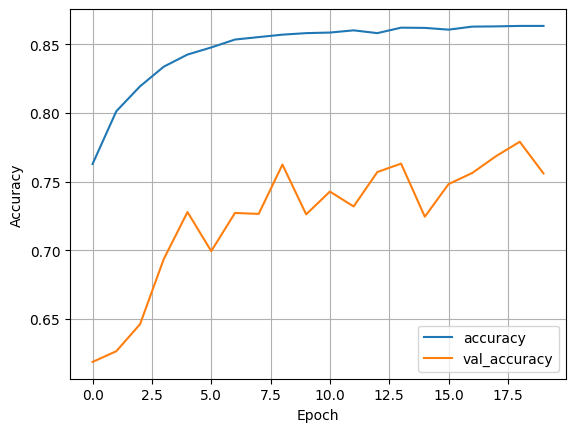

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3318
16 nodes, dropout 0, lr 0.001, batch size 128


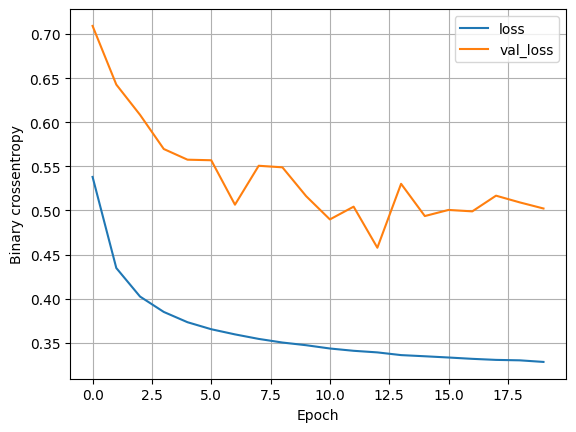

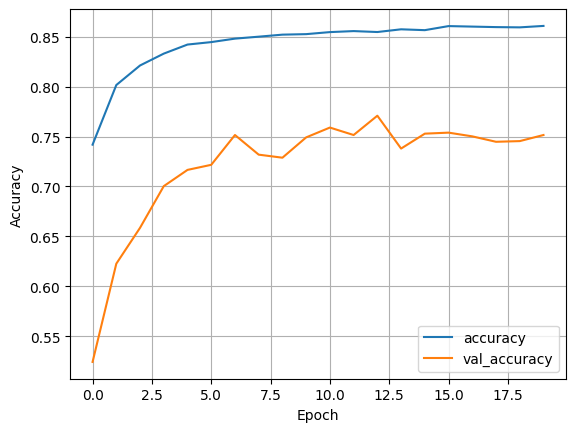

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8655 - loss: 0.3351
16 nodes, dropout 0.2, lr 0.01, batch size 32


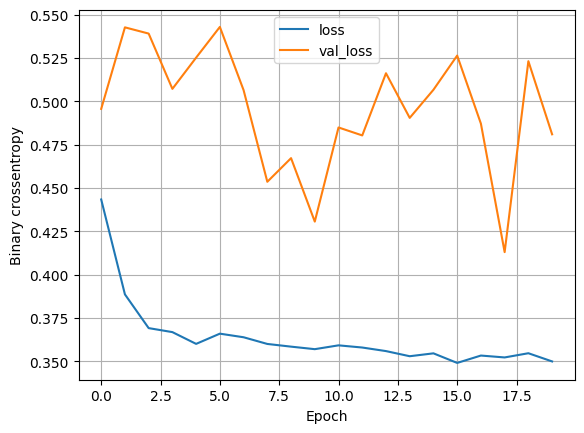

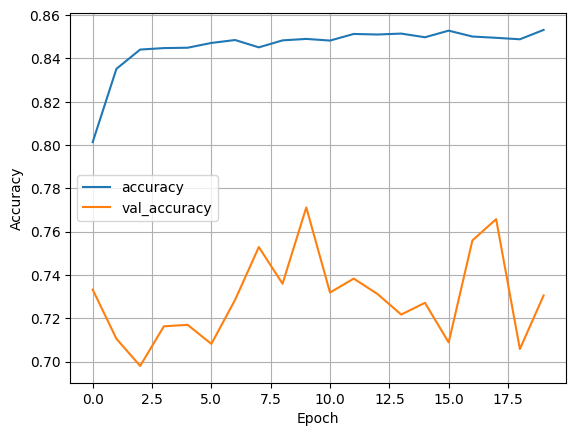

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8633 - loss: 0.3338
16 nodes, dropout 0.2, lr 0.01, batch size 64


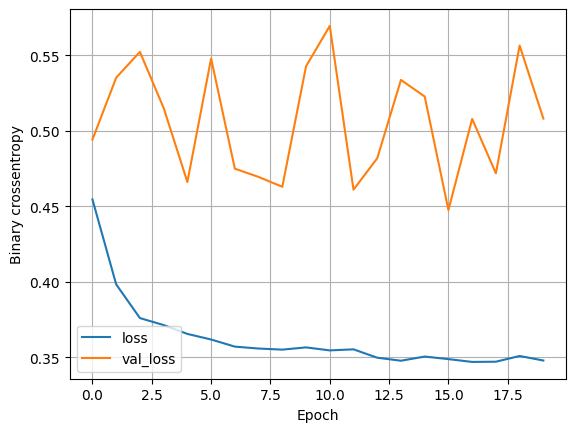

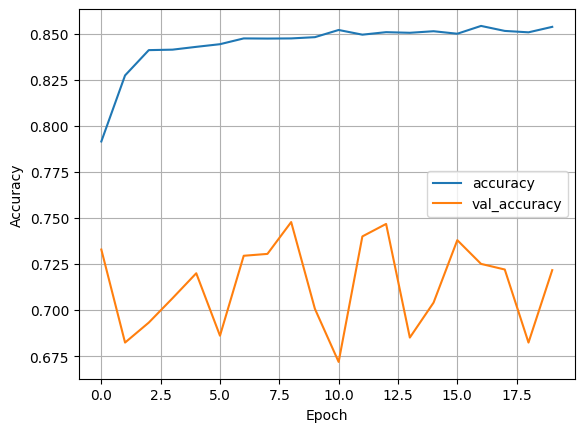

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8546 - loss: 0.3313
16 nodes, dropout 0.2, lr 0.01, batch size 128


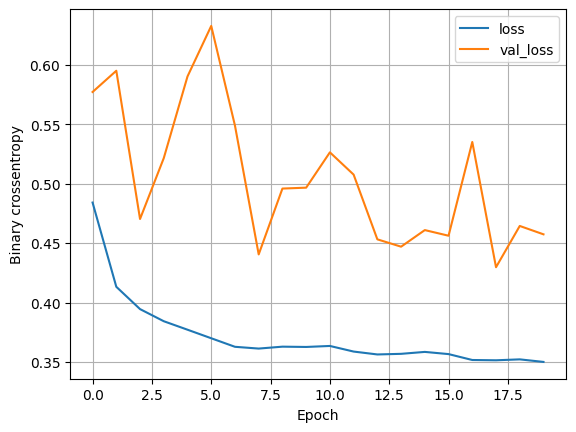

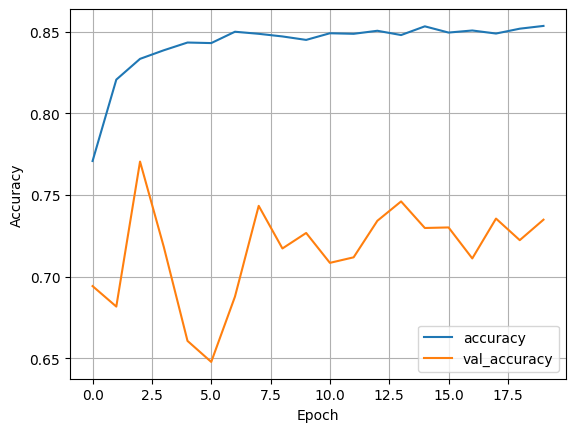

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 0.3406
16 nodes, dropout 0.2, lr 0.005, batch size 32


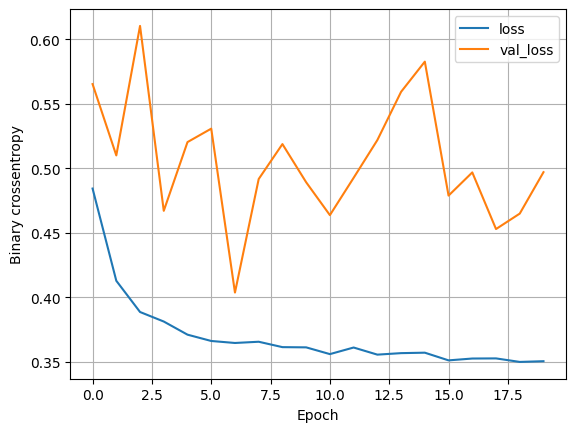

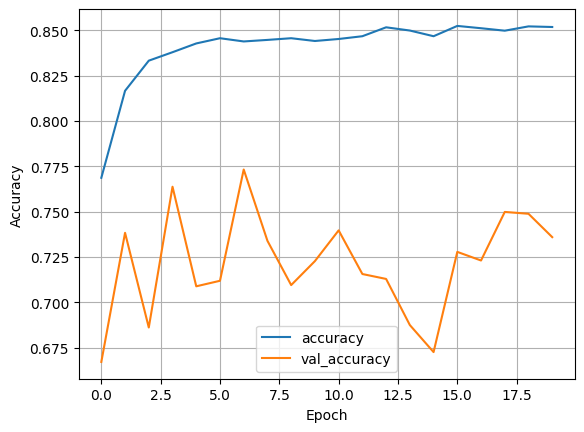

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8674 - loss: 0.3289
16 nodes, dropout 0.2, lr 0.005, batch size 64


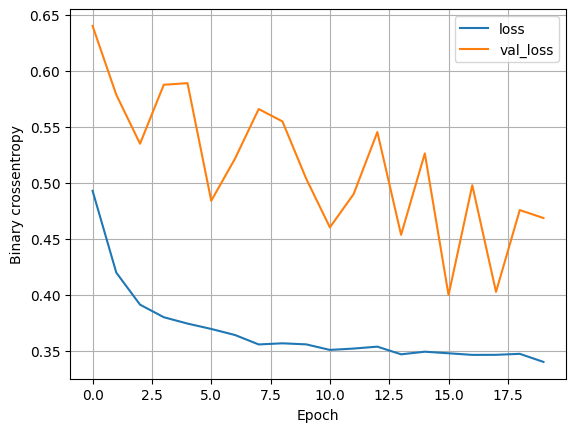

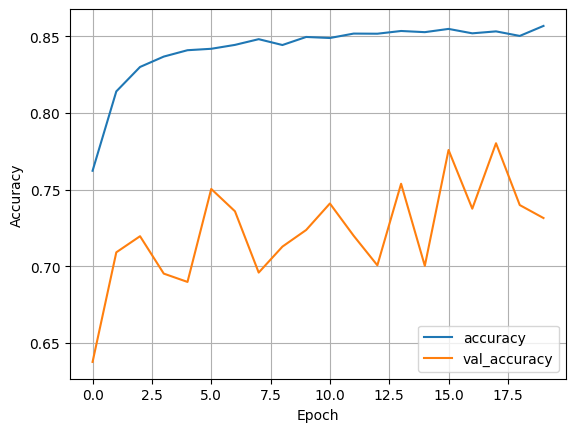

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.3284
16 nodes, dropout 0.2, lr 0.005, batch size 128


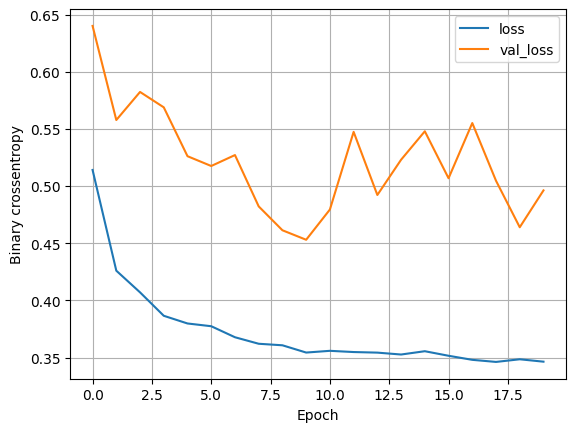

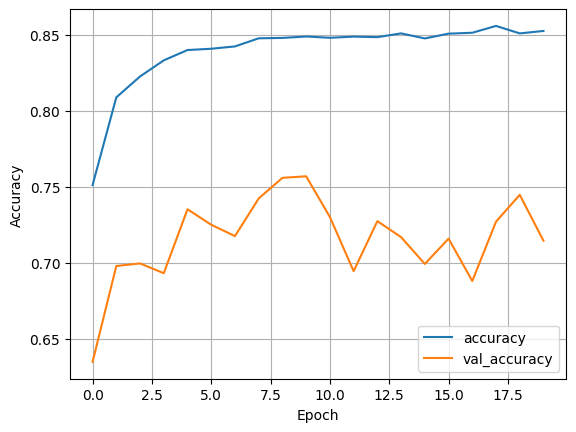

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.3306
16 nodes, dropout 0.2, lr 0.001, batch size 32


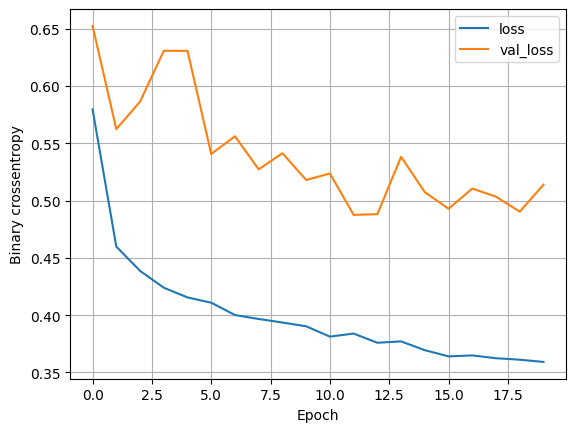

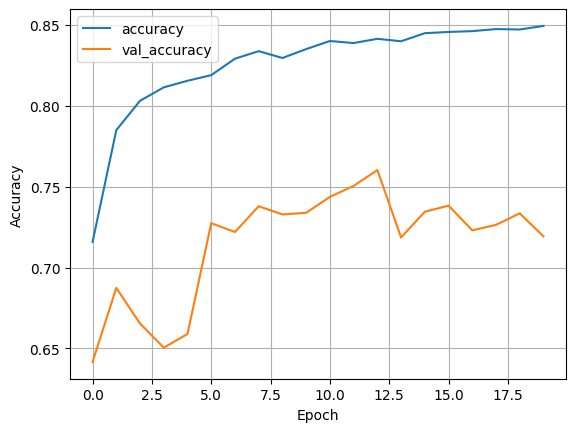

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3333
16 nodes, dropout 0.2, lr 0.001, batch size 64


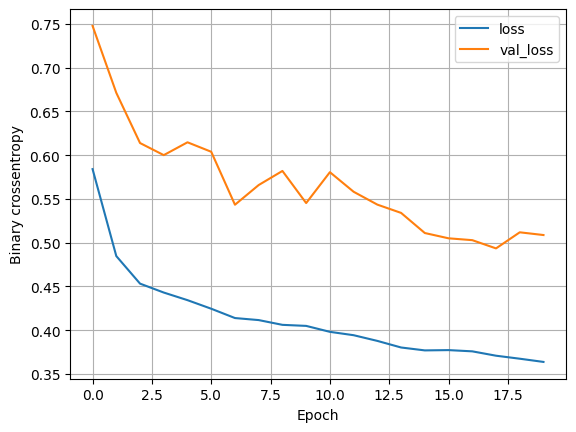

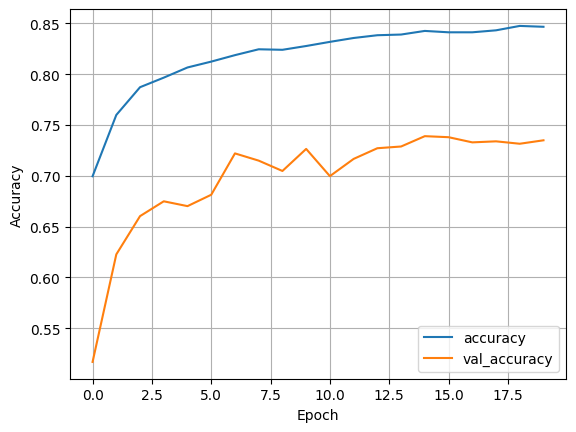

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8637 - loss: 0.3370
16 nodes, dropout 0.2, lr 0.001, batch size 128


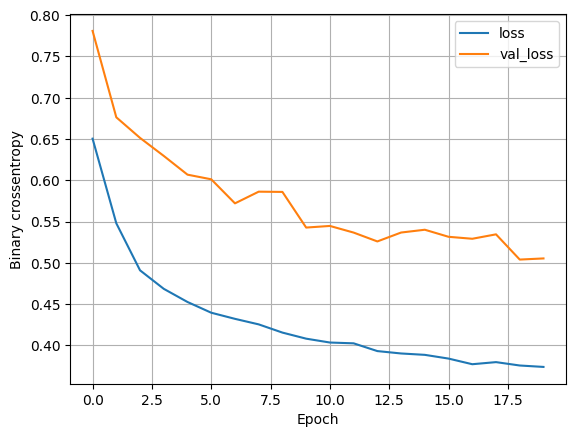

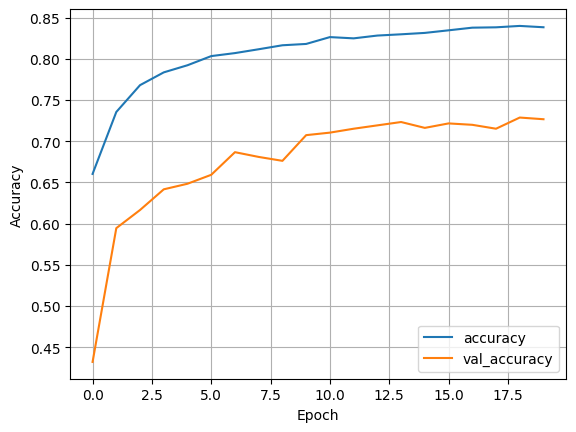

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8597 - loss: 0.3449
32 nodes, dropout 0, lr 0.01, batch size 32


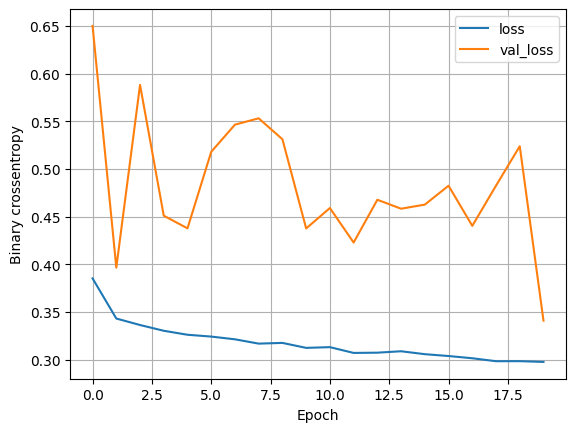

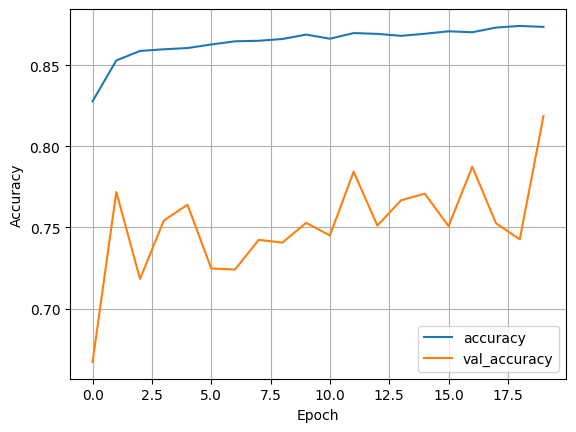

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8652 - loss: 0.3401
32 nodes, dropout 0, lr 0.01, batch size 64


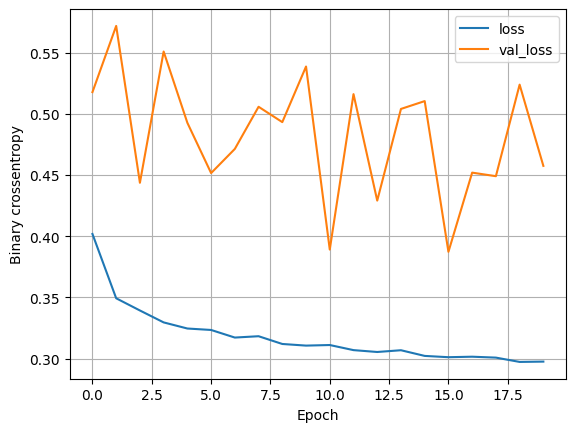

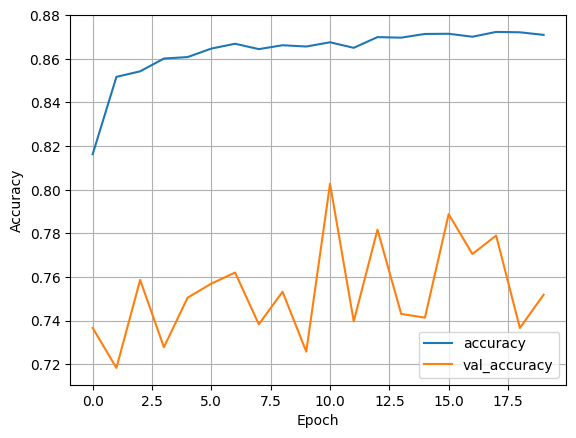

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8794 - loss: 0.3266
32 nodes, dropout 0, lr 0.01, batch size 128


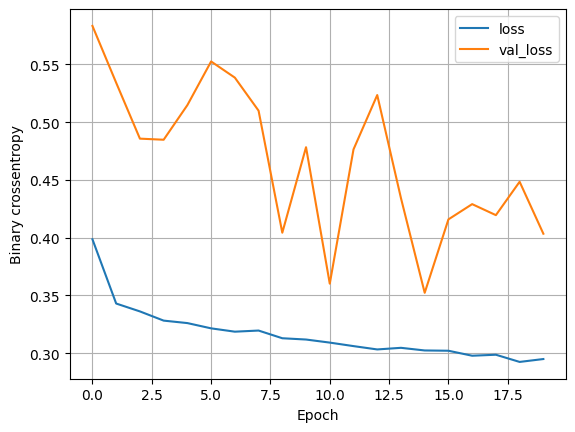

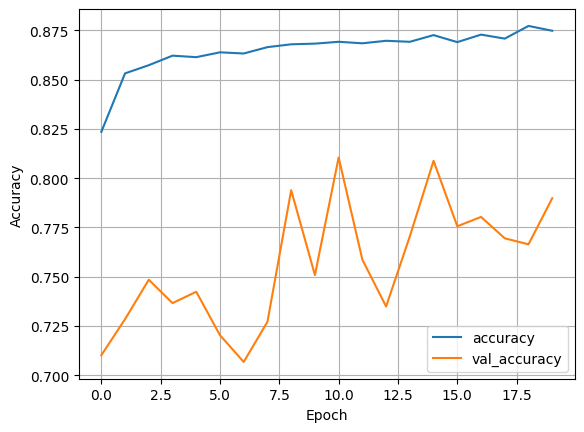

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8752 - loss: 0.3210
32 nodes, dropout 0, lr 0.005, batch size 32


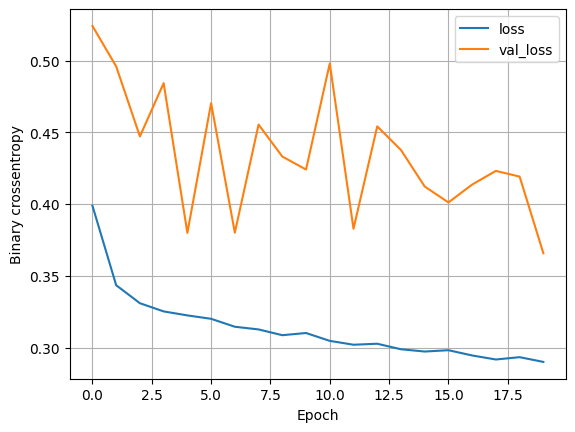

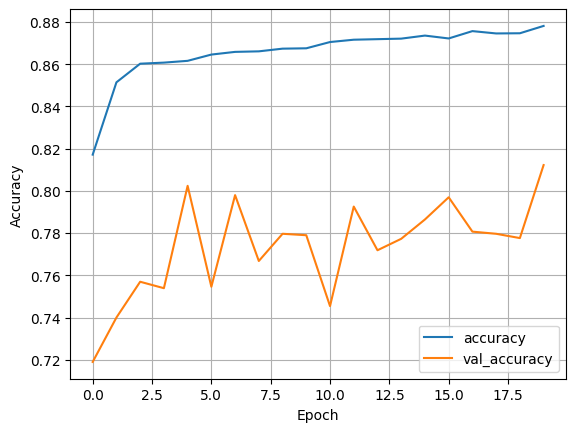

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3253
32 nodes, dropout 0, lr 0.005, batch size 64


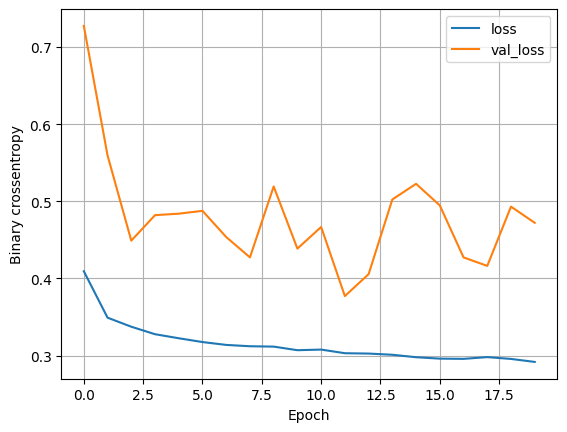

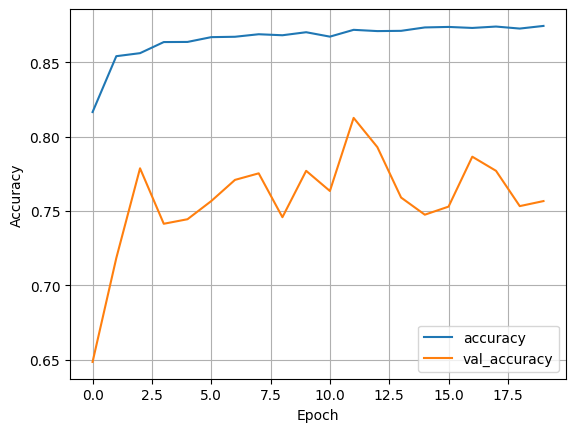

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8743 - loss: 0.3089
32 nodes, dropout 0, lr 0.005, batch size 128


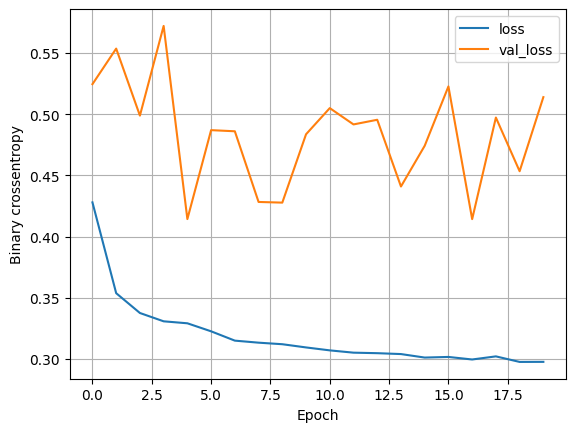

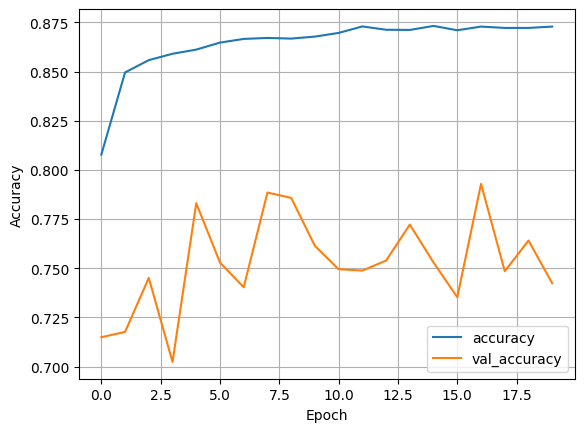

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8770 - loss: 0.3156
32 nodes, dropout 0, lr 0.001, batch size 32


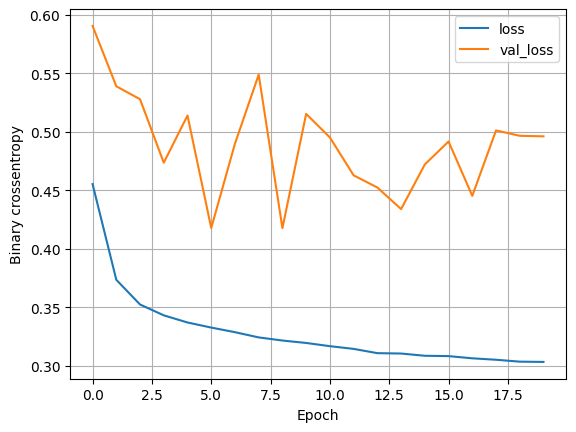

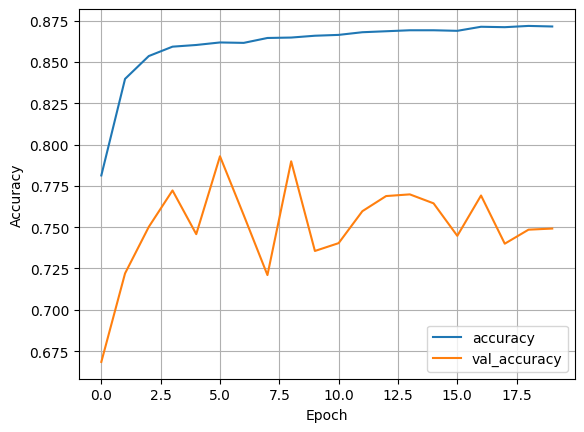

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8743 - loss: 0.3220
32 nodes, dropout 0, lr 0.001, batch size 64


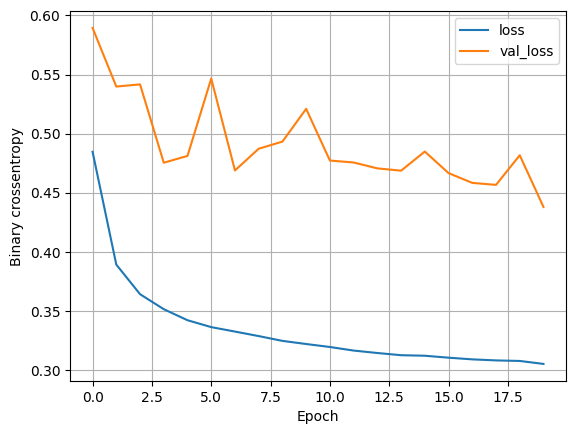

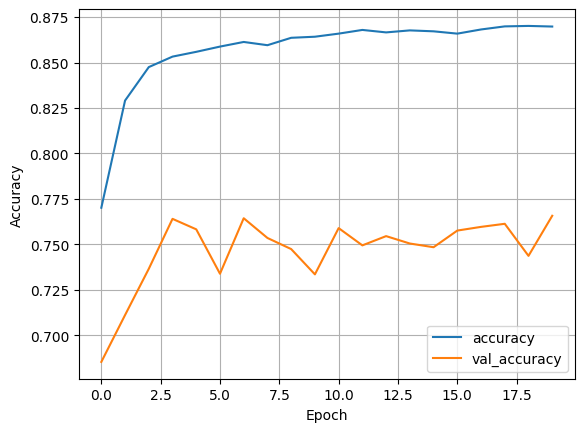

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8739 - loss: 0.3232
32 nodes, dropout 0, lr 0.001, batch size 128


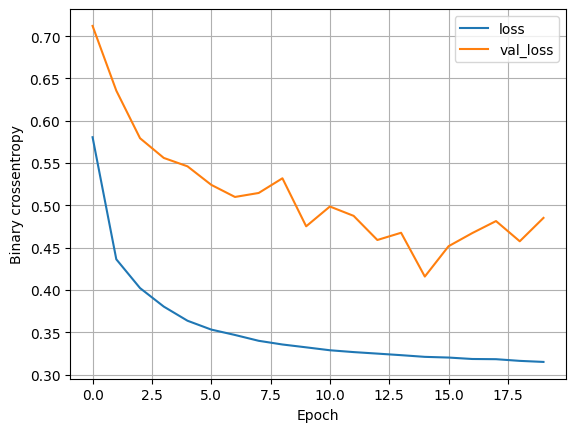

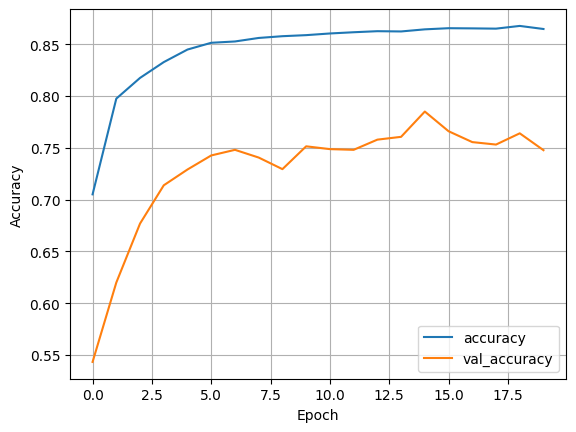

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.3303
32 nodes, dropout 0.2, lr 0.01, batch size 32


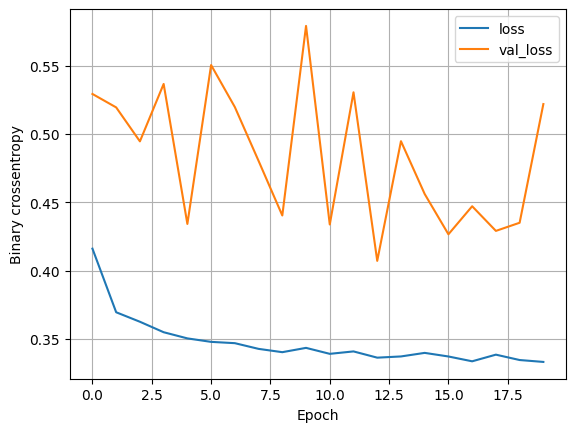

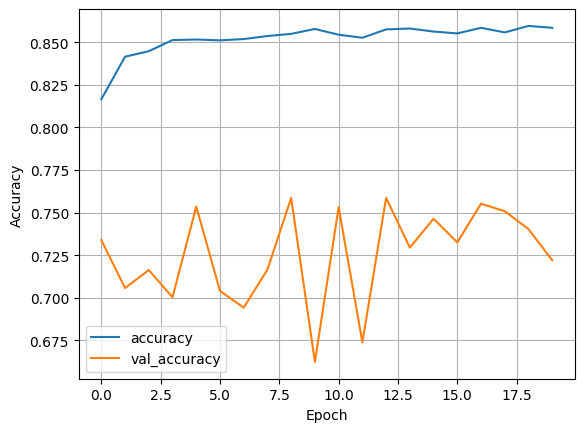

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8613 - loss: 0.3373
32 nodes, dropout 0.2, lr 0.01, batch size 64


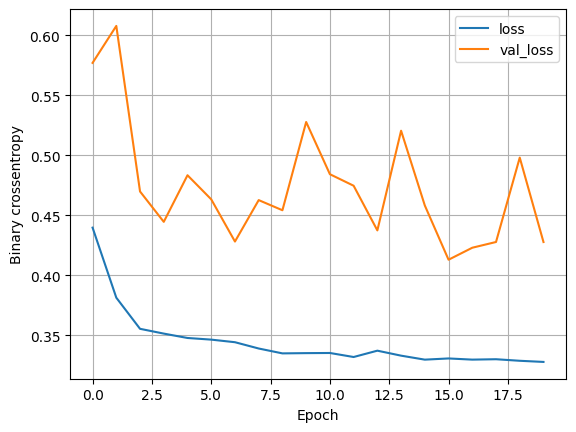

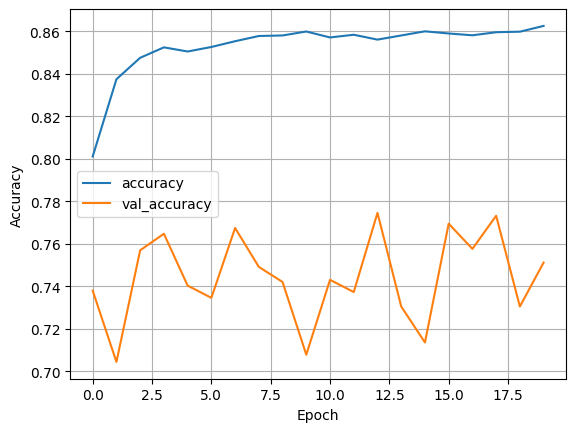

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8707 - loss: 0.3174
32 nodes, dropout 0.2, lr 0.01, batch size 128


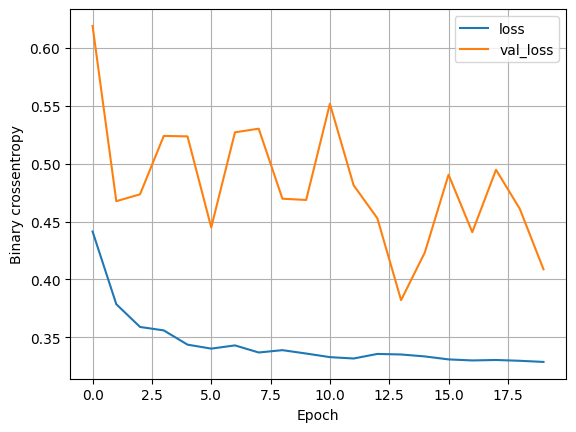

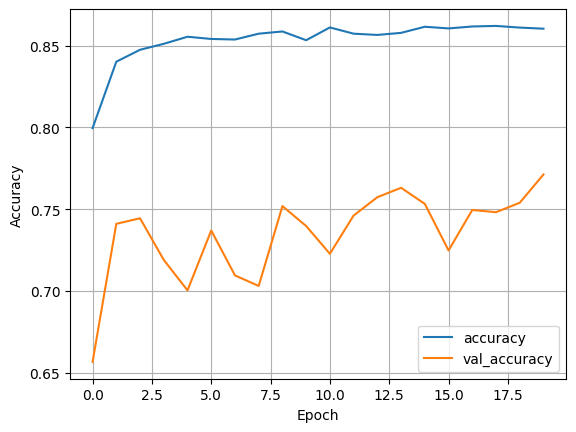

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3266
32 nodes, dropout 0.2, lr 0.005, batch size 32


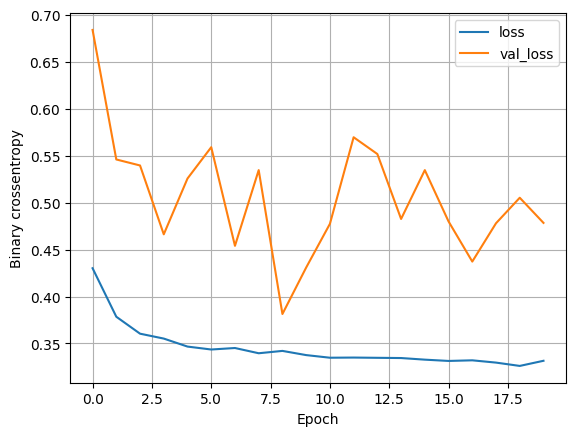

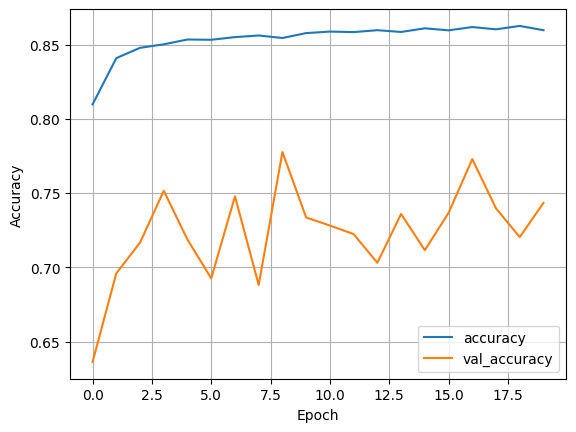

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3150
32 nodes, dropout 0.2, lr 0.005, batch size 64


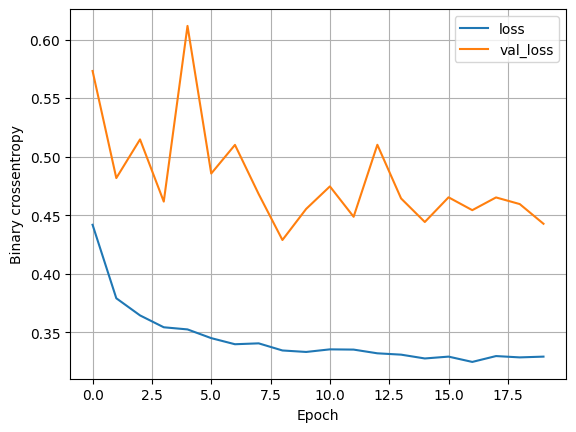

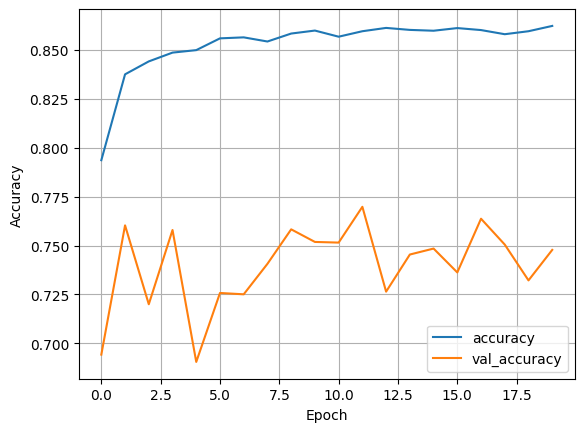

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8683 - loss: 0.3201
32 nodes, dropout 0.2, lr 0.005, batch size 128


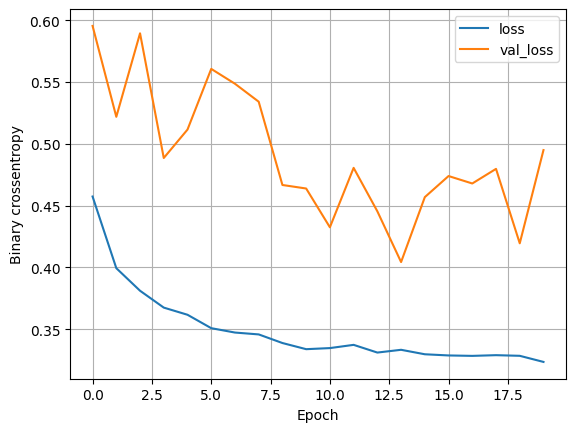

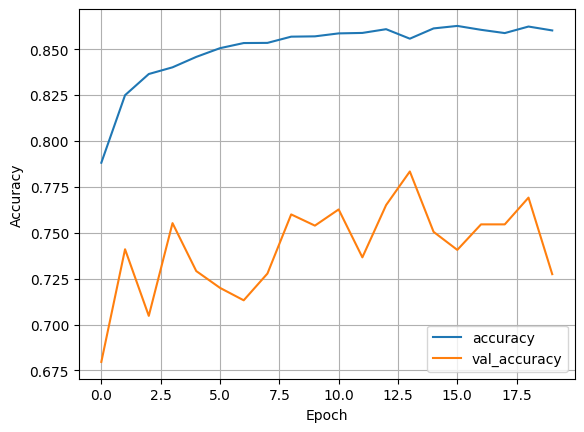

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8708 - loss: 0.3110
32 nodes, dropout 0.2, lr 0.001, batch size 32


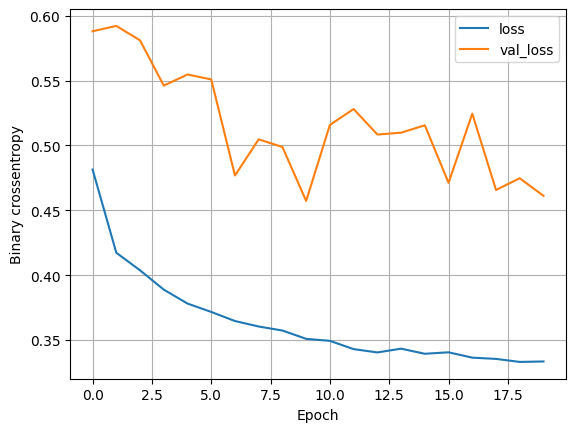

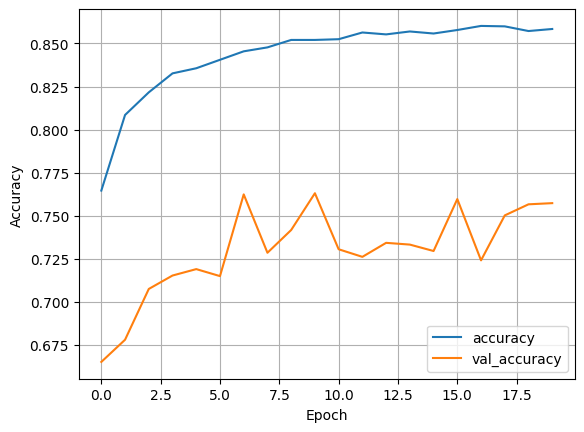

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.3288
32 nodes, dropout 0.2, lr 0.001, batch size 64


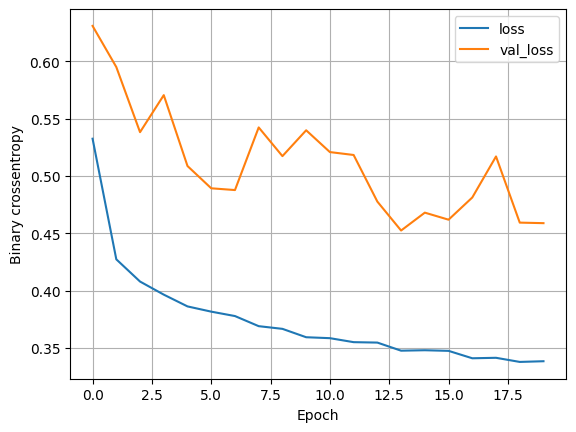

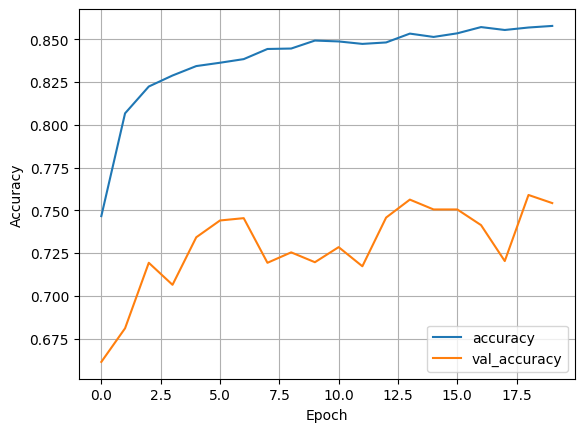

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3261
32 nodes, dropout 0.2, lr 0.001, batch size 128


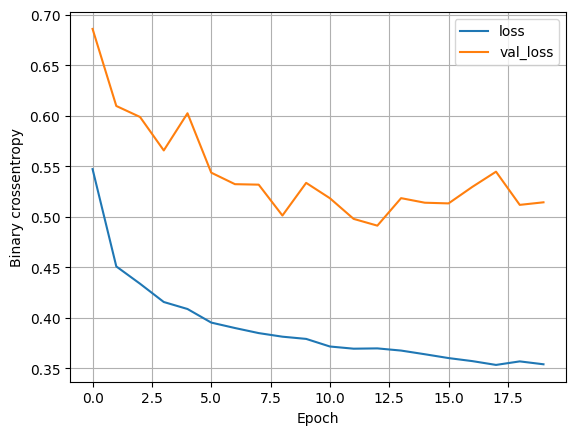

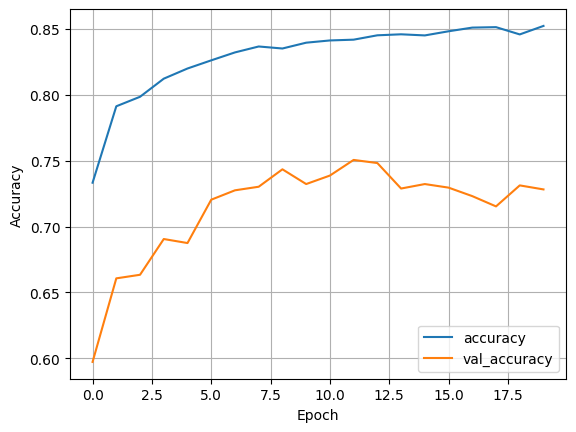

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8623 - loss: 0.3311
64 nodes, dropout 0, lr 0.01, batch size 32


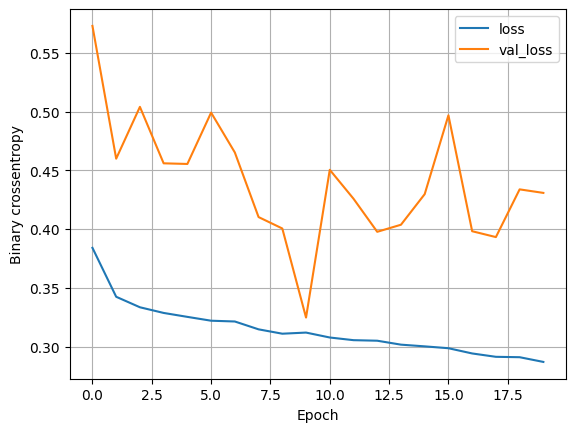

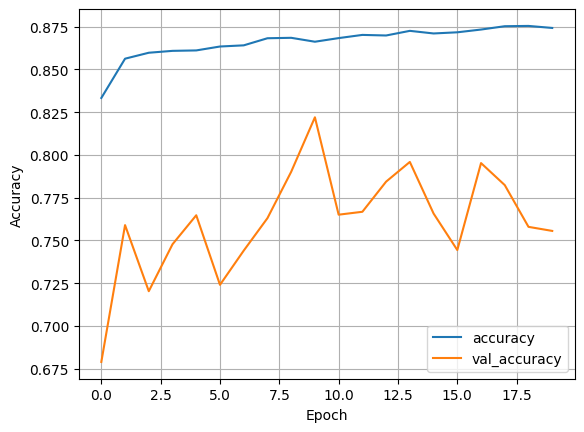

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8785 - loss: 0.3198
64 nodes, dropout 0, lr 0.01, batch size 64


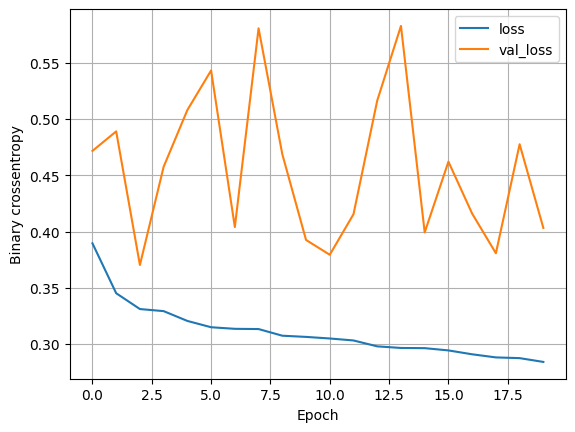

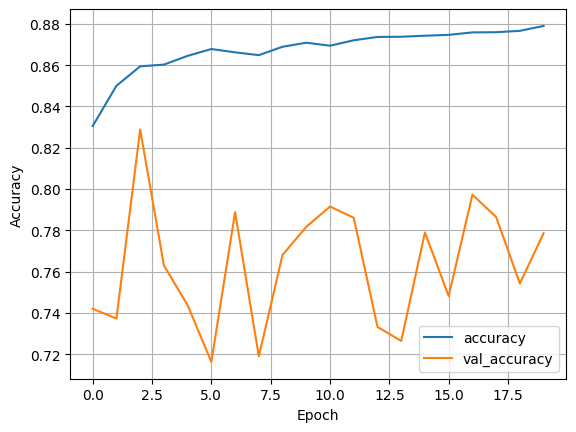

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8697 - loss: 0.3223
64 nodes, dropout 0, lr 0.01, batch size 128


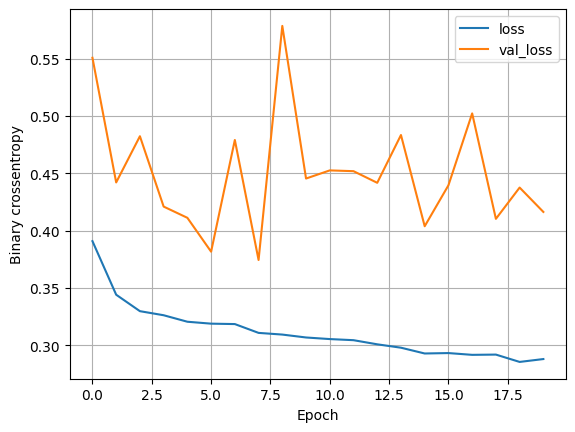

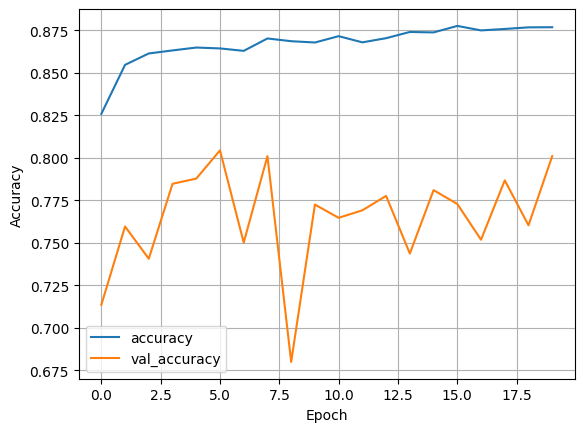

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.3329
64 nodes, dropout 0, lr 0.005, batch size 32


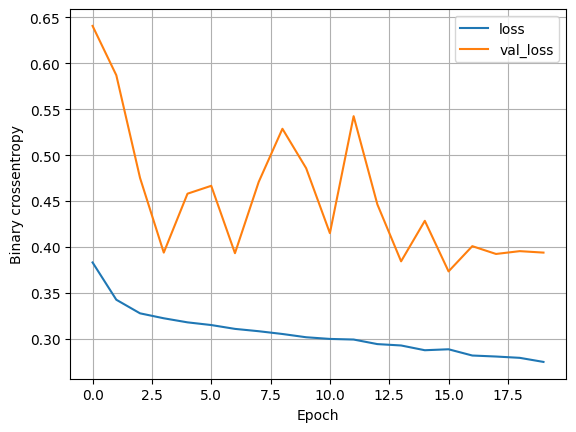

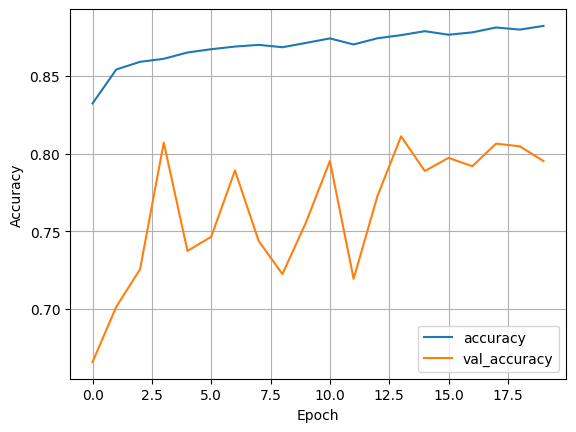

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8708 - loss: 0.3297
64 nodes, dropout 0, lr 0.005, batch size 64


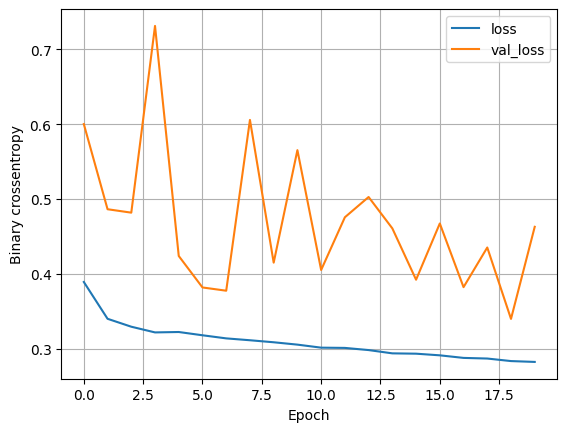

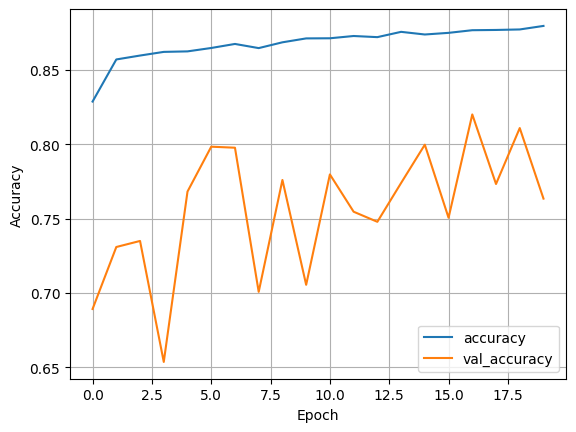

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8751 - loss: 0.3160
64 nodes, dropout 0, lr 0.005, batch size 128


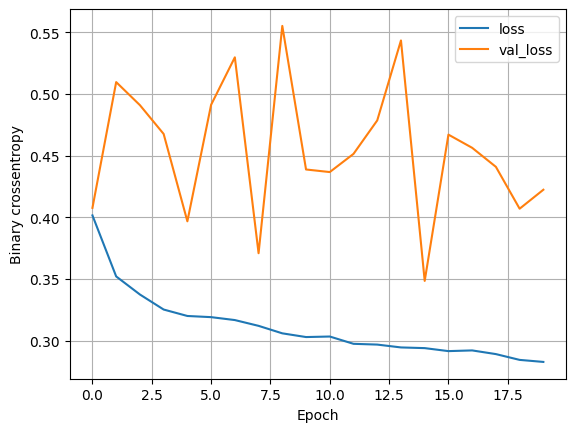

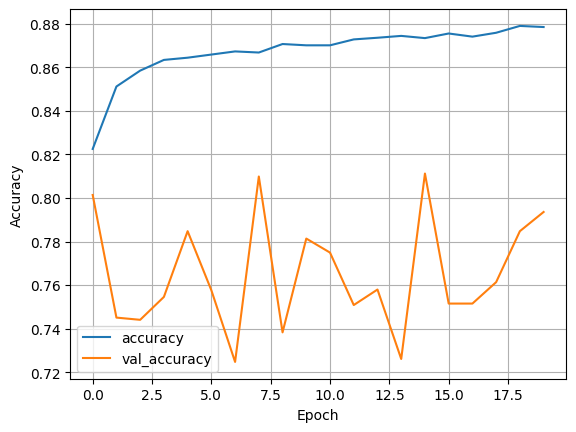

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8737 - loss: 0.3145
64 nodes, dropout 0, lr 0.001, batch size 32


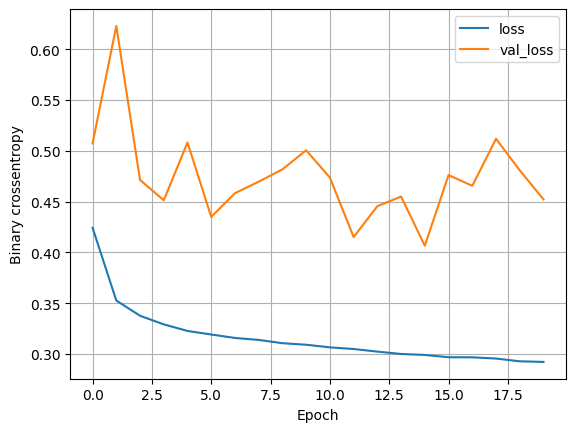

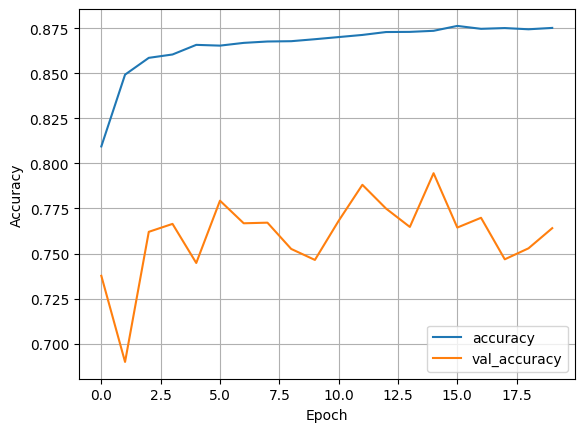

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8784 - loss: 0.3114
64 nodes, dropout 0, lr 0.001, batch size 64


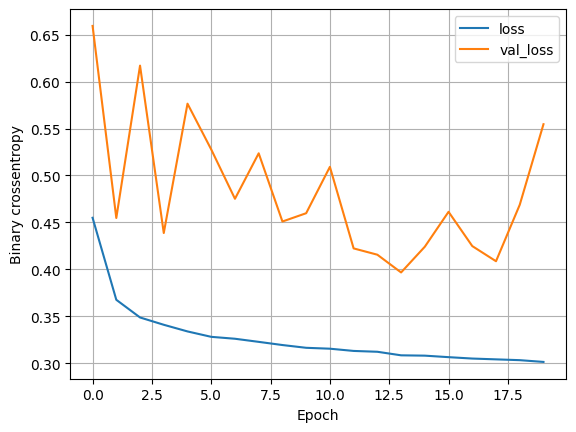

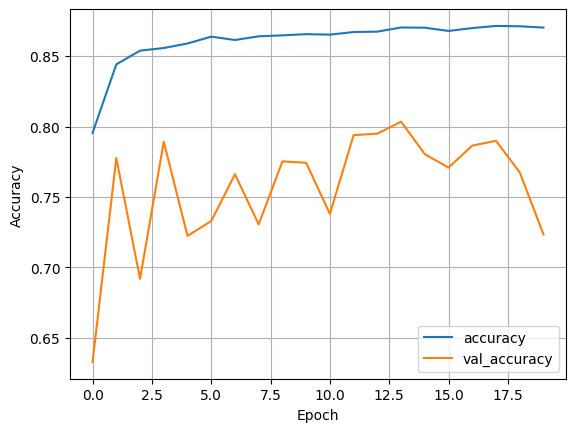

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3176
64 nodes, dropout 0, lr 0.001, batch size 128


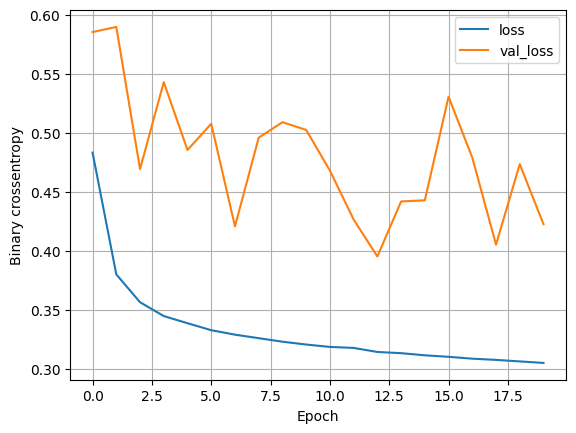

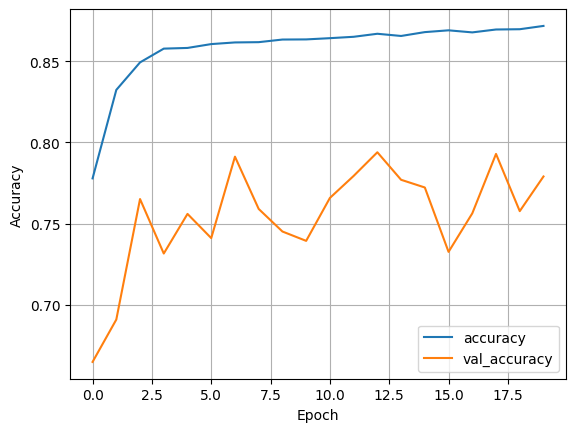

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8711 - loss: 0.3249
64 nodes, dropout 0.2, lr 0.01, batch size 32


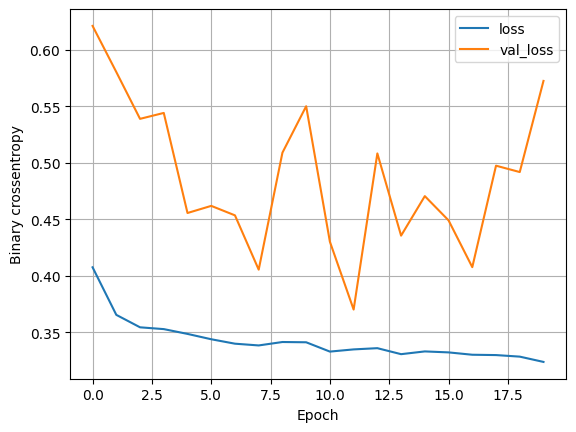

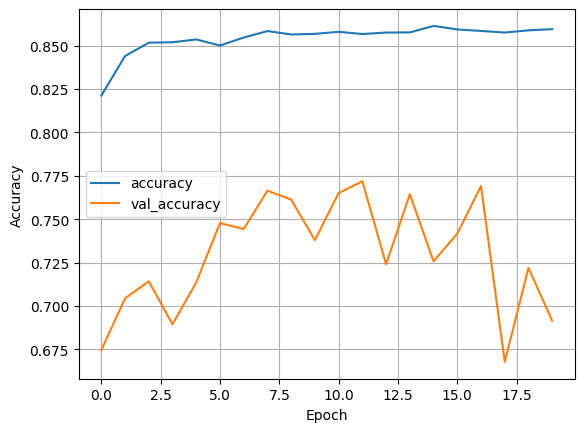

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.3256
64 nodes, dropout 0.2, lr 0.01, batch size 64


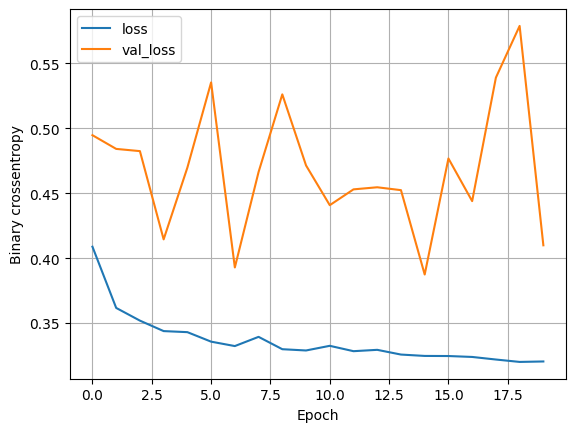

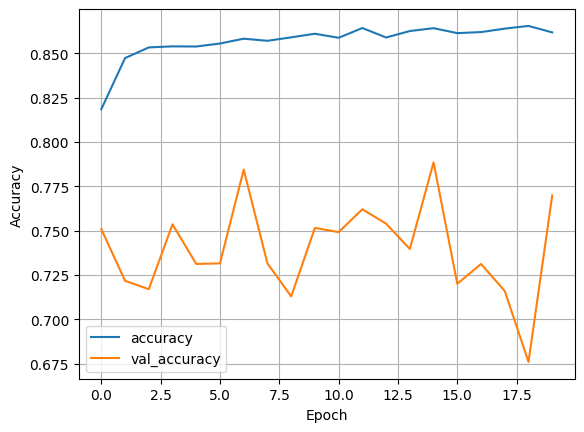

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8679 - loss: 0.3268
64 nodes, dropout 0.2, lr 0.01, batch size 128


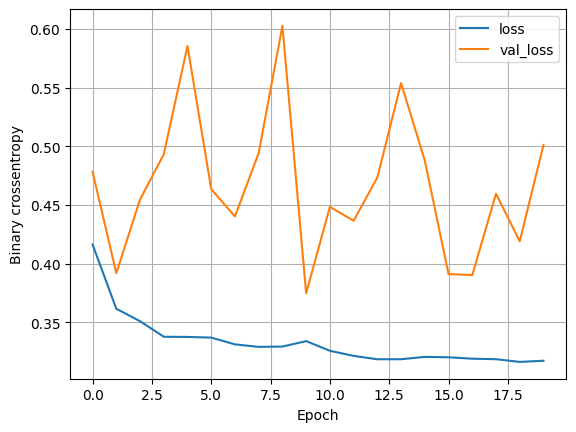

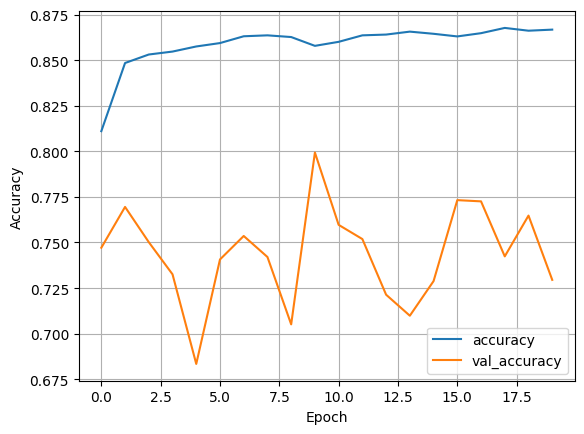

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.3124
64 nodes, dropout 0.2, lr 0.005, batch size 32


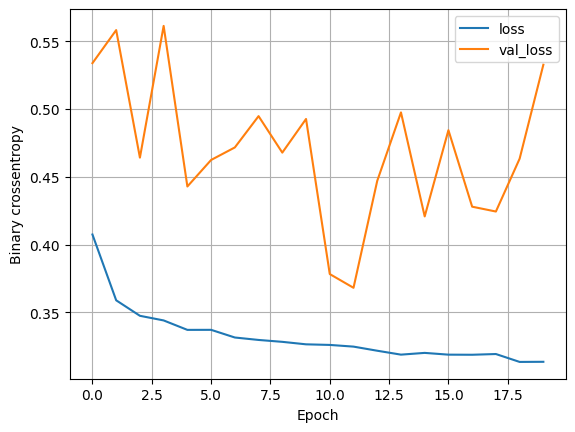

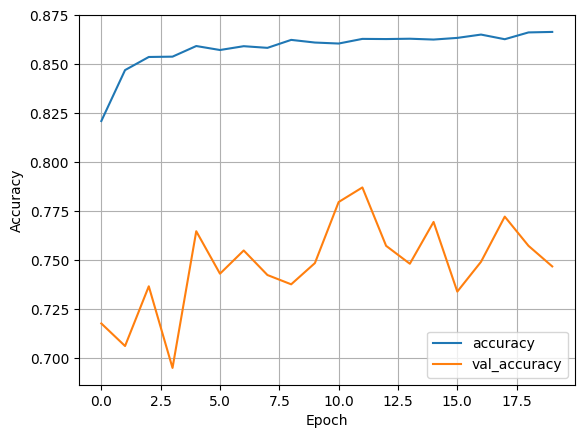

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8730 - loss: 0.3205
64 nodes, dropout 0.2, lr 0.005, batch size 64


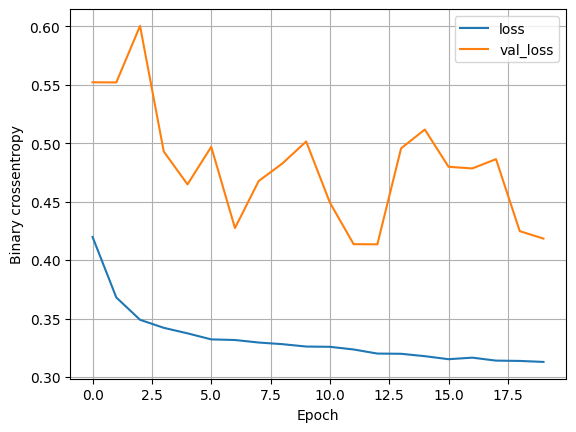

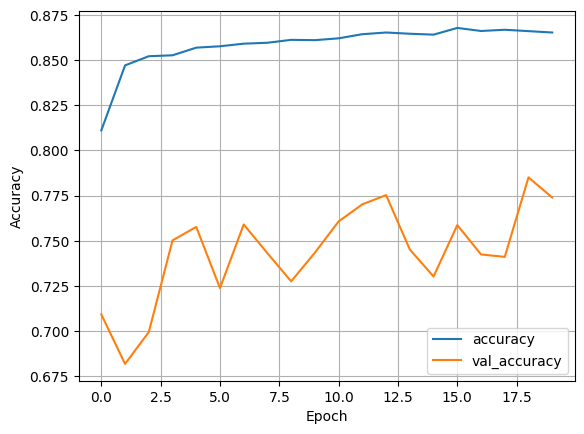

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8748 - loss: 0.3184
64 nodes, dropout 0.2, lr 0.005, batch size 128


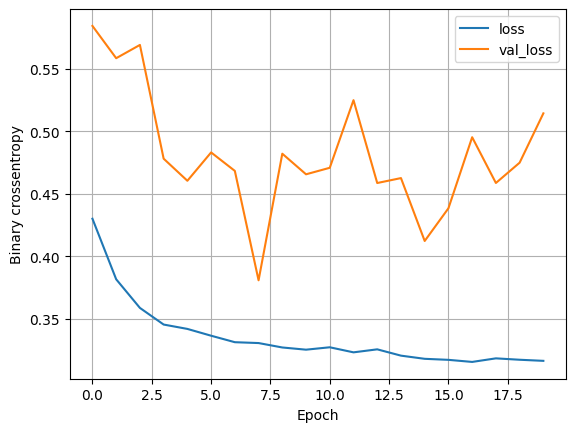

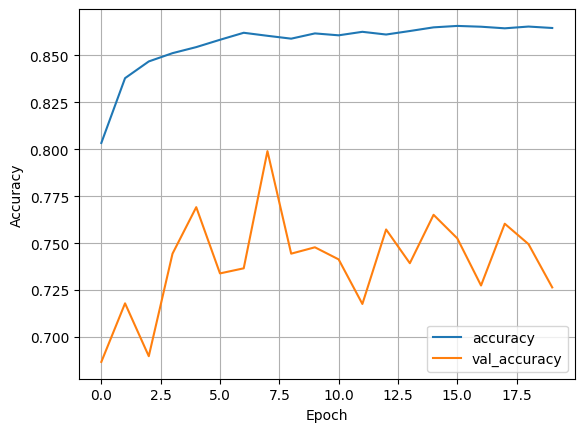

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8778 - loss: 0.3135
64 nodes, dropout 0.2, lr 0.001, batch size 32


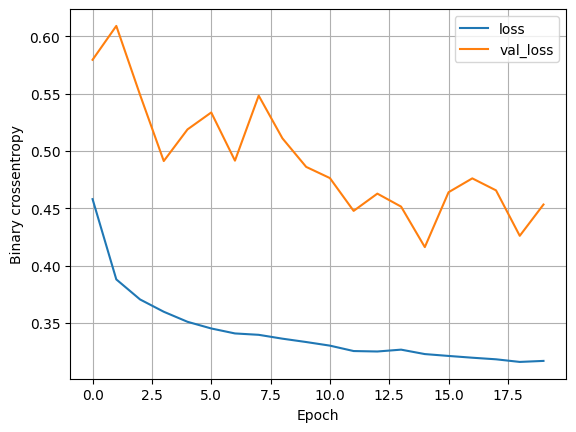

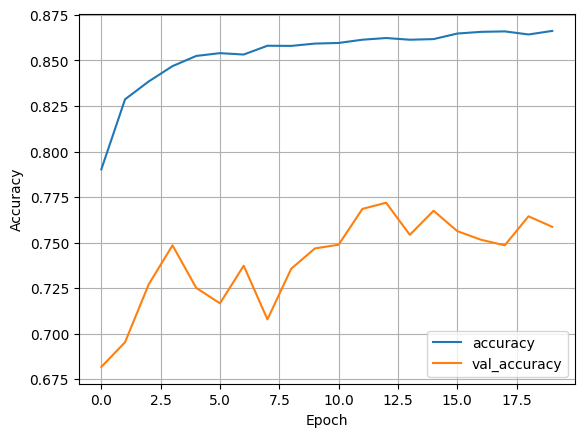

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8731 - loss: 0.3109
64 nodes, dropout 0.2, lr 0.001, batch size 64


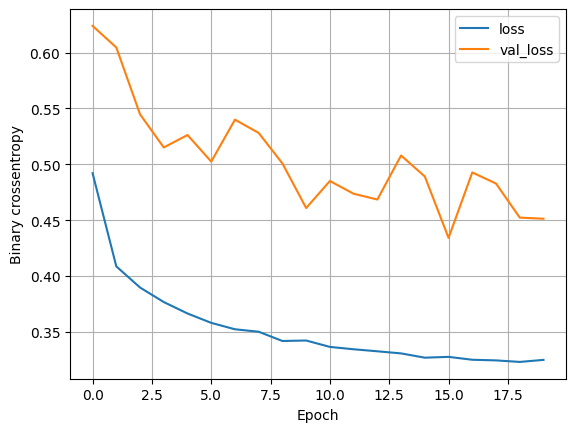

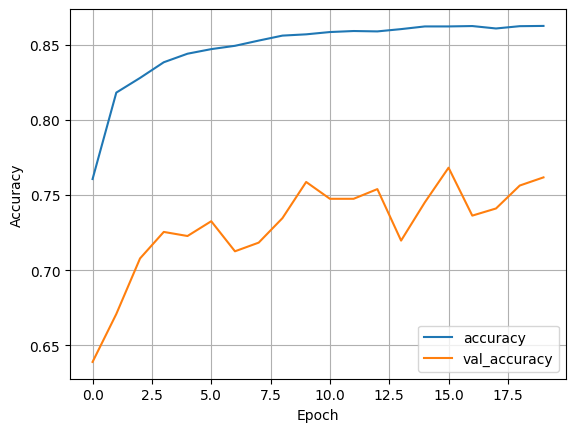

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.3193
64 nodes, dropout 0.2, lr 0.001, batch size 128


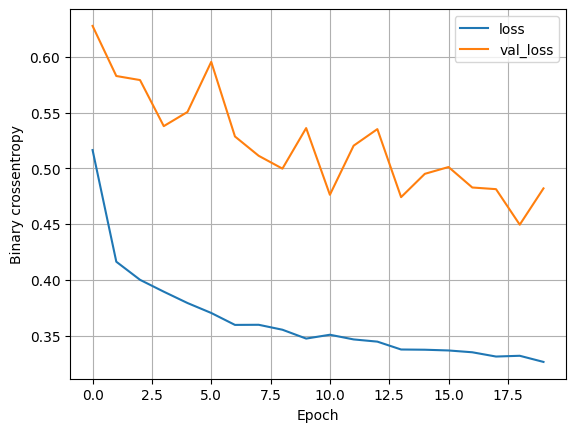

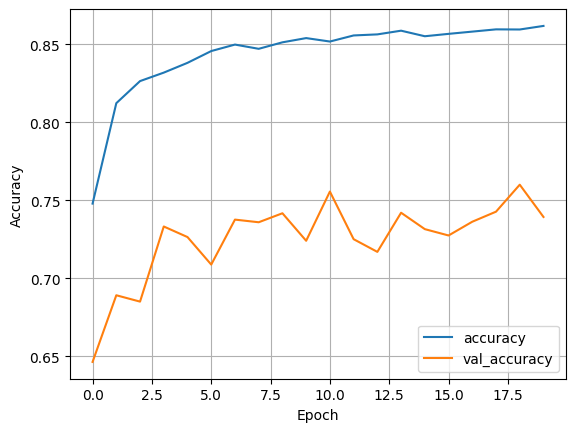

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8715 - loss: 0.3206


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=20
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        history, model = train(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_loss(history)
        plot_accuracy(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1315
           1       0.88      0.94      0.91      2489

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.88      0.87      3804

